Problem 1:

Let matrix #1 be M1, and matrix #2 be M2. 

Given-
Dimensions of M1 = n X k
Dimensions of M2 = k X m 

Sol-

We know the resultant matrix (M = M1M2) will be of order n X m. Hence, it will have n*m elements. To answer this problem, we will first calculate the number of multiplications and additions required for one element in M:

For an element in the ith row and jth column in M (denoted as Mij), each element in the ith row of M1 is multiplied by its corresponding element in the jth column in M2. Then, all these products are added to calculate Mij.
Hence, this results in k multiplications for one element Mij. And, there are n*m elements in M.

Hence, a total of n*m*k multiplications. 

Also, to add k numbers (k products), k-1 additions are to be done.
 
Hence, a total of n*m*(k-1) additions are required. 

In [2]:
# Problem 2
import random
import time
import numpy as np
n = int(input ("Enter the #rows in M1:")) 
k = int(input("Enter the #cols in M1:")) 
m = int(input("Enter the #cols in M2: ")) 

# M1 
M1 = []
for i in range(0, n):
    row = []
    for j in range(0, k):
        row.append(random.randint(5000, 100000)) 
    M1.append(row)

# M2
M2 = [] 
for i in range(0, k):
    row = []
    for j in range(0, m):
        row.append(random.randint(5000, 100000)) 
    M2.append(row)

# Matrix multiplication using lists of lists   
counter = 1000 
time_array_mm = []
while (counter):

  M = [] 
  begin_ll = time.time()
  for i in range(0, n):
      row = [0]*m
      for j in range(0, m):
          for l in range(0, k):
              row[j] += M1[i][l]*M2[l][j]
      M.append(row)
  end_ll = time.time() 
  time_array_mm.append('%.20f' % (end_ll - begin_ll))
  counter -= 1
time_array_mm = np.array(time_array_mm).astype(float)
mean_time_mm = np.mean(time_array_mm)
std_time_mm = np.std(time_array_mm)
print("The time taken using lists of lists is {} +- {} seconds".format('%.20f' % (mean_time_mm), '%.20f' % (std_time_mm)))
# print(M1, '\n')
# print(M2, '\n')
# print(M)

# Matrix multiplication using numPy
M1 = np.array(M1) 
M2 = np.array(M2)  
counter = 1000 
time_array_np = []
while(counter):
  begin_np = time.time()
  M = np.dot(M1, M2)
  end_np = time.time() 
  time_array_np.append('%.20f' % (end_np - begin_np)) 
  counter -= 1 
time_array_np = np.array(time_array_np).astype(float)
mean_time_np = np.mean(time_array_np)
std_time_np = np.std(time_array_np)
print("The time taken using numpy is {} +- {} seconds".format('%.20f' % (mean_time_np), '%.20f' % (std_time_np)))

# print(M)
# print("The time taken using numPy is", '%.20f' % (end_np - begin_np), "seconds.")


Enter the #rows in M1:50
Enter the #cols in M1:20
Enter the #cols in M2: 40
The time taken using lists of lists is 0.00911647701263427687 +- 0.00101866625647482889 seconds
The time taken using numpy is 0.00003342127799987793 +- 0.00003337142642347423 seconds


In problem 2, we have observed that method 2 (using Numpy) is faster than method 1(using list of lists). It is mainly because of the following reasons:

1. Numpy uses C language at the backend which makes it faster than functions (like matrix multiplication) written wholly in Python. 

2. Numpy maintains the information (for example np.arrays) in data structures easily managed and manipulated using C which saves time. 

Problem 3

Using the method suggested in the question, we will have to make [n/2]+1 passes of the array (where, n is the length of the array). Hence, the time
complexity of this method is O(n*n/2) => O(n^2). 
A better approach to find the median of an array can be by sorting. Using merge sort we can sort the array in O(nlog(n)) time complexity. After sorting the
array, we can calculate the median in constant time because we know the index of the median in the sorted array and any element of the array with known index
can be obtained in O(n) time (or even in constant time). Hence, overall time complexity = O(nlogn) + O(n) = O(nlogn)

In [3]:
import timeit
import numpy as np
n = int(input("Enter the length of the array : ")) 
nums = np.random.randint(-100, 100, n) 
print("The array is : ", nums) 



# Method 1: passing through the array n/2 times
def pass_array(arri, n):
  arr = arri.copy()
  prev_max = -100000
  maxi  = -100000
  num_passes = n//2 + 1
  counter = 1
  while (counter <= num_passes): 
    maxi = -10000
    index_max = -1
    for i in range(0, n):
      if (arr[i] > maxi):
        maxi = arr[i]
        index_max =  i 
    if (n %2 == 0 and counter == num_passes -1 ):
      prev_max = maxi
    arr[index_max] = -10000
    
    counter += 1
  if (n % 2):
    return maxi 
  else:
    return (maxi + prev_max)/2

print("Median by method 1 : ", pass_array(nums, n)) 

# print(nums)

# Method 2: By sorting the array 
def sort_array(arri, n):
  arr = arri.copy() 
  arr.sort() 
  if (n % 2):
    return arr[n//2] 
  else:
    return (arr[n//2] + arr[n//2 -1])/2
  
print('Median by sorting the array is ', sort_array(nums, n)) 
# print(nums) 
print("Median by using np.median() is ", np.median(nums))

if __name__ == "__main__":
    time_m1 = np.array( timeit.repeat("pass_array(nums, n)","from __main__ import pass_array, nums, n", number = 1000,   repeat = 10)) 
    print("The time taken by passing the array (n/2+1) times  is {} +- {} seconds".format(np.mean(time_m1) , np.std(time_m1)))
  
    # print(time_m1)
if __name__ == "__main__":
    time_m2 = np.array( timeit.repeat("sort_array(nums, n)","from __main__ import sort_array, nums, n", number = 1000,   repeat = 10)) 
    print("The time taken by sorting the array  is {} +- {} seconds".format(np.mean(time_m2) , np.std(time_m2))) 

if __name__ == "__main__":

    nums = np.array(nums)
    time_m3 = np.array( timeit.repeat("np.median(nums)","from __main__ import nums, np", number = 1000,   repeat = 10)) 
    print("The time taken by using np.median  is {} +- {} seconds".format(np.mean(time_m3) , np.std(time_m3))) 



Enter the length of the array : 55
The array is :  [ 84 -15 -47 -43  24  71 -81 -20  43  82 -62 -87  15  66 -68  11 -98  44
  -6 -80 -56  88  74  -9  72  -7 -78  56 -64  44  61 -21 -18 -76 -99  -3
 -65  97  89 -95  98 -43 -83 -77  14  98  53 -80 -50  92 -26 -85 -52  17
  62]
Median by method 1 :  -9
Median by sorting the array is  -9
Median by using np.median() is  -9.0
The time taken by passing the array (n/2+1) times  is 0.23077702400000816 +- 0.03184457078001081 seconds
The time taken by sorting the array  is 0.0010726661000035164 +- 0.0005077600474741235 seconds
The time taken by using np.median  is 0.016853780700057542 +- 0.004281479001441152 seconds


In problem 3, we have observed that calculating the median by sorting the array is the fastest method. Then comes the method of using np.median() function. And, the method in which we traversed the array [n/2]+1 times is the slowest of all three.

Problem 4 

Given Function - 

$f(x, y) = x^2y + y^3sin(x)$ 

Gradient of the above function is a vector:

$\triangledown f(x, y) = [
   \frac{\partial f(x, y)}{\partial x} , \frac{\partial f(x, y)}{\partial y} ]$

$\frac{\partial f(x, y)}{\partial x} = 2xy + y^3cos(x)$    [w.r.t. x]

$\frac{\partial f(x, y)}{\partial y} = x^2 + 3y^2sin(x)$  [w.r.t y]

Hence, the gradient of $f(x, y)$ is :

$[2xy + y^3cos(x) , x^2 + 3y^2sin(x) ]$


In [4]:
# Problem 5
import math
import jax 
import jax.numpy as jnp
from jax import grad 
import random

def f(x, y): 
    return jnp.power(x, 2)*y + jnp.power(y, 3)*jnp.sin(x) 
   

def mygrad(x, y):
    return (2*x*y + jnp.power(y, 3)*jnp.cos(x), jnp.power(x, 2) + 3*jnp.power(y, 2)*jnp.sin(x))

grad_jax = grad(f, argnums = (0, 1)) 

for i in range(5):
  xval = random.uniform(-100, 100) 
  yval = random.uniform (-100, 100) 
  
  print("The value of the gradient calculated by me at x = {} and y = {} is".format(xval, yval), "({}, {})".format(mygrad(xval, yval)[0],mygrad(xval, yval)[1] ) ) 
  print("The value of the gradient calculated by JAX at x = {} and y = {} is".format(xval, yval), "({}, {})".format((grad_jax(xval, yval))[0],(grad_jax(xval, yval))[1] ) ) 

print("As we can see the value of the gradient at each point in both the manual and JAX methods are same analytically.")





The value of the gradient calculated by me at x = -93.4069714086053 and y = 94.609607977879 is (547057.9375, 28735.134765625)
The value of the gradient calculated by JAX at x = -93.4069714086053 and y = 94.609607977879 is (547057.9375, 28735.134765625)
The value of the gradient calculated by me at x = 72.79496315471968 and y = 26.831423411817255 is (-12678.21875, 4191.78515625)
The value of the gradient calculated by JAX at x = 72.79496315471968 and y = 26.831423411817255 is (-12678.21875, 4191.78515625)
The value of the gradient calculated by me at x = -39.164030755493215 and y = 54.499136346651966 is (12837.4658203125, -7326.7509765625)
The value of the gradient calculated by JAX at x = -39.164030755493215 and y = 54.499136346651966 is (12837.46484375, -7326.7509765625)
As we can see the value of the gradient at each point in both the manual and JAX methods are same analytically.


In [5]:
# Problem 6:
from sympy import *
from sympy import Symbol, diff, sin
import math

x=Symbol('x') 
y=Symbol('y')
f = x**2*y + y**3*sin(x)

pdiff_x = diff(f, x)   
pdiff_y  = diff(f, y)
print("The gradient calculated from sympy is a vector : [{} , {}]".format(pdiff_x, pdiff_y))
def mygrad(x, y):
    return (2*x*y + pow(y, 3)*math.cos(x), pow(x, 2) + 3*pow(y, 2)*math.sin(x))

for i in range(5):
  xval = random.uniform(-100, 100) 
  yval = random.uniform (-100, 100)
  print("The value of the gradient calculated by sympy at x = {} and y = {} is".format(xval, yval), "({}, {})".format(pdiff_x.subs([(x, xval), (y, yval)]), pdiff_y.subs([(x, xval), (y, yval)]) ) ) 
  print("The value of the gradient calculated by me at x = {} and y = {} is".format(xval, yval), "({}, {})".format(mygrad(xval, yval)[0],mygrad(xval, yval)[1]) ) 
  
print("As we can see the value of the gradient at each point in both the manual and sympy methods are same analytically.")





The gradient calculated from sympy is a vector : [2*x*y + y**3*cos(x) , x**2 + 3*y**2*sin(x)]
The value of the gradient calculated by sympy at x = 27.62187613728966 and y = 38.48493301124168 is (-43165.5295452710, 3460.66021076668)
The value of the gradient calculated by me at x = 27.62187613728966 and y = 38.48493301124168 is (-43165.52954527103, 3460.660210766684)
The value of the gradient calculated by sympy at x = -55.80889727125064 and y = -95.8410842406048 is (-639549.125040853, 21691.0041488829)
The value of the gradient calculated by me at x = -55.80889727125064 and y = -95.8410842406048 is (-639549.1250408533, 21691.00414888288)
The value of the gradient calculated by sympy at x = -6.859908860965987 and y = -99.98117306218886 is (-836408.641041078, -16305.1939125209)
The value of the gradient calculated by me at x = -6.859908860965987 and y = -99.98117306218886 is (-836408.641041078, -16305.19391252088)
The value of the gradient calculated by sympy at x = -64.66322941539164 an

In [25]:
# Problem 7 
database = {"2022" : {
    "Branch 1":{
        "RN 1":{"Name": "Olive" ,  "Marks" : {"Maths": 100, "English" : 89, "Biology" : 80}},
        "RN 2":{"Name": "Cal" ,  "Marks" : {"Maths": 90, "English" : 70, "Biology" : 92}}
    }, 
    "Branch 2":{
        "RN 1":{"Name": "Grace" ,  "Marks" : {"Maths": 76, "English" : 89, "Biology" : 70}},
        "RN 2":{"Name": "Ben" ,  "Marks" : {"Maths": 89, "English" : 60, "Biology" : 92}}
    }
}, 
               "2023" : {
       "Branch 1":{
        "RN 1":{"Name": "Mike" ,  "Marks" : {"Maths": 100, "English" : 79, "Biology" : 100}},
        "RN 2":{"Name": "Jared" ,  "Marks" : {"Maths": 80, "English" : 60, "Biology" : 62}}
    }, 
    "Branch 2":{
        "RN 1":{"Name": "Adrian" ,  "Marks" : {"Maths": 76, "English" : 89, "Biology" : 70}},
        "RN 2":{"Name": "Angelina" ,  "Marks" : {"Maths": 89, "English" : 60, "Biology" : 92}}
    }             
               },
               "2024" : {
         "Branch 1":{
        "RN 1":{"Name": "Mikami" ,  "Marks" : {"Maths": 100, "English" : 79, "Biology" : 100}},
        "RN 2":{"Name": "Jonathan" ,  "Marks" : {"Maths": 80, "English" : 60, "Biology" : 62}}
    }, 
    "Branch 2":{
        "RN 1":{"Name": "Will" ,  "Marks" : {"Maths": 76, "English" : 89, "Biology" : 70}},
        "RN 2":{"Name": "Ell" ,  "Marks" : {"Maths": 89, "English" : 60, "Biology" : 92}}
    }  
               },
               "2025" : {
            "Branch 1":{
        "RN 1":{"Name": "Zeeke" ,  "Marks" : {"Maths": 100, "English" : 79, "Biology" : 100}},
        "RN 2":{"Name": "Nancy" ,  "Marks" : {"Maths": 80, "English" : 60, "Biology" : 62}}
    }, 
    "Branch 2":{
        "RN 1":{"Name": "Adrian" ,  "Marks" : {"Maths": 76, "English" : 89, "Biology" : 70}},
        "RN 2":{"Name": "Angelina" ,  "Marks" : {"Maths": 89, "English" : 60, "Biology" : 92}}
    }    
               },
               }

print(database) 




{'2022': {'Branch 1': {'RN 1': {'Name': 'Olive', 'Marks': {'Maths': 100, 'English': 89, 'Biology': 80}}, 'RN 2': {'Name': 'Cal', 'Marks': {'Maths': 90, 'English': 70, 'Biology': 92}}}, 'Branch 2': {'RN 1': {'Name': 'Grace', 'Marks': {'Maths': 76, 'English': 89, 'Biology': 70}}, 'RN 2': {'Name': 'Ben', 'Marks': {'Maths': 89, 'English': 60, 'Biology': 92}}}}, '2023': {'Branch 1': {'RN 1': {'Name': 'Mike', 'Marks': {'Maths': 100, 'English': 79, 'Biology': 100}}, 'RN 2': {'Name': 'Jared', 'Marks': {'Maths': 80, 'English': 60, 'Biology': 62}}}, 'Branch 2': {'RN 1': {'Name': 'Adrian', 'Marks': {'Maths': 76, 'English': 89, 'Biology': 70}}, 'RN 2': {'Name': 'Angelina', 'Marks': {'Maths': 89, 'English': 60, 'Biology': 92}}}}, '2024': {'Branch 1': {'RN 1': {'Name': 'Mikami', 'Marks': {'Maths': 100, 'English': 79, 'Biology': 100}}, 'RN 2': {'Name': 'Jonathan', 'Marks': {'Maths': 80, 'English': 60, 'Biology': 62}}}, 'Branch 2': {'RN 1': {'Name': 'Will', 'Marks': {'Maths': 76, 'English': 89, 'Biolo

In [1]:
# Problem 8  
class Year:  
  def __init__(self, year, branches): 
    self.year = year
    self.branches = branches 

class Branch:
  def __init__(self, branch, students):
    self.branch = branch 
    self.students = students 

class Student: 
  def __init__(self, name, rollnum, marks): 
    self.name = name
    self.rollnum = rollnum 
    self.marks = marks 

database = [
    Year("2022", 
         [Branch("Branch 1" ,  [Student("Olive", "1" , {"Maths": 100, "English": 100, "Biology": 100}) ,  Student("Cal", "2", {"Maths": 100, "English": 100, "Biology": 100} )  ]     ), 
          Branch("Branch 2" ,  [Student("Grace", "1" , {"Maths": 100, "English": 100, "Biology": 100}) ,  Student("Ben", "2", {"Maths": 100, "English": 100, "Biology": 100} )  ] )]) ,
    Year("2023", 
         [Branch("Branch 1" ,  [Student("Mike", "1" , {"Maths": 100, "English": 100, "Biology": 100}) ,  Student("Gabriel", "2", {"Maths": 100, "English": 100, "Biology": 100} )  ]     ), 
          Branch("Branch 2" ,  [Student("Steve", "1" , {"Maths": 100, "English": 100, "Biology": 100}) ,  Student("Ben", "2", {"Maths": 100, "English": 100, "Biology": 100} )  ] )])   ,
    Year("2024", 
         [Branch("Branch 1" ,  [Student("Dustin", "1" , {"Maths": 100, "English": 100, "Biology": 100}) ,  Student("Benny", "2", {"Maths": 100, "English": 100, "Biology": 100} )  ]     ), 
          Branch("Branch 2" ,  [Student("Rio", "1" , {"Maths": 100, "English": 100, "Biology": 100}) ,  Student("Jane", "2", {"Maths": 100, "English": 100, "Biology": 100} )  ] )]) ,
    Year("2025", 
         [Branch("Branch 1" ,  [Student("Lucas", "1" , {"Maths": 100, "English": 100, "Biology": 100}) ,  Student("Henry", "2", {"Maths": 100, "English": 100, "Biology": 100} )  ]     ), 
          Branch("Branch 2" ,  [Student("Maxine", "1" , {"Maths": 100, "English": 100, "Biology": 100}) ,  Student("Spenser", "2", {"Maths": 100, "English": 100, "Biology": 100} )  ] )])   
]




[<__main__.Year object at 0x7f970b017d30>, <__main__.Year object at 0x7f970b017fa0>, <__main__.Year object at 0x7f970b01e220>, <__main__.Year object at 0x7f970b01e4c0>]


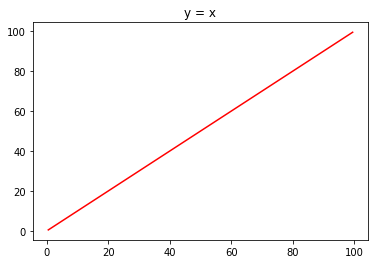

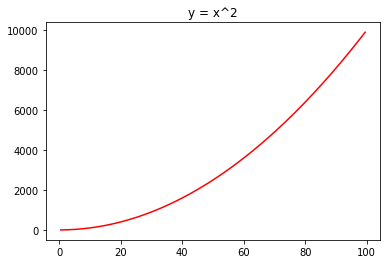

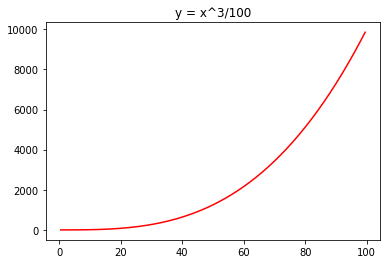

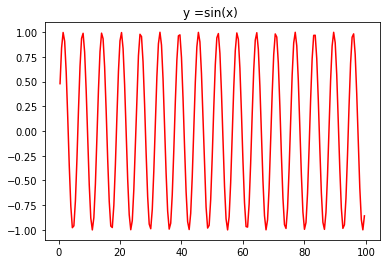

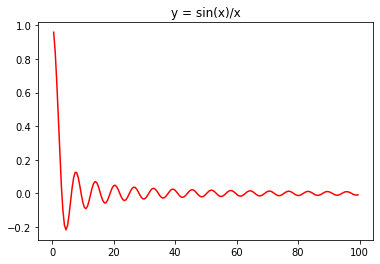

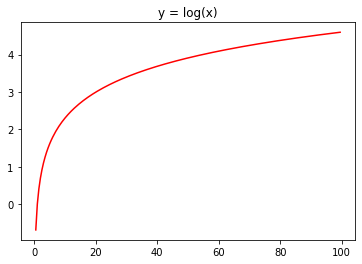

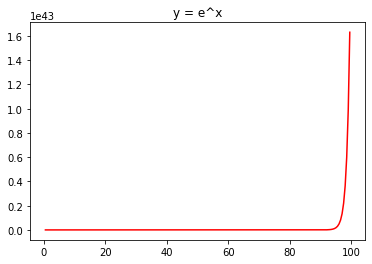

In [3]:
# Problem 9
import numpy as np
from matplotlib import pyplot as plt

def f1(x):
  return x 
def f2(x):
  return pow(x, 2) 
def f3(x):
  return pow(x, 3)/100 
def f4(x):
  return np.sin(x) 
def f5(x):
  return np.sin(x)/x
def f6(x):
  return np.log(x) 
def f7(x):
  return np.exp(x) 

x = np.arange(0.5, 100.0, 0.5)

plt.plot(x, f1(x), color='red')
plt.title("y = x")
plt.show()
plt.plot(x, f2(x), color='red')
plt.title("y = x^2")
plt.show()
plt.plot(x, f3(x), color='red')
plt.title("y = x^3/100")
plt.show()
plt.plot(x, f4(x), color='red')
plt.title("y =sin(x) ")
plt.show()
plt.plot(x, f5(x), color='red')
plt.title("y = sin(x)/x")
plt.show()
plt.plot(x, f6(x), color='red')
plt.title("y = log(x)")
plt.show()
plt.plot(x, f7(x), color='red')
plt.title("y = e^x")

plt.show()

In [7]:
# Problem 10
print("Problem 10 -")
import numpy as np
import pandas as pd

mat = np.random.uniform(1, 2, (20, 5)) 
dataframe = pd.DataFrame(mat)  
dataframe.columns = ['a', 'b', 'c', 'd', 'e']
print(mat) 
print(dataframe) 
std_dev = {} 
std_dev['a'] = dataframe['a'].std()
std_dev['b'] = dataframe['b'].std()
std_dev['c'] = dataframe['c'].std()
std_dev['d'] = dataframe['d'].std()
std_dev['e'] = dataframe['e'].std()

kv_pairs = list(std_dev.items())
# print(kv_pairs)
kv_pairs.sort(key = lambda x: x[1]) 
print("the column with highest standard deviation is ", kv_pairs[4][0], "with the std dev of ", kv_pairs[4][1])

row_mean = dict(dataframe.mean(axis = 1))

row_mean_pairs = list(row_mean.items()) 
row_mean_pairs.sort(key = lambda x: x[1]) 
print("The row with the lowest mean is row number ", row_mean_pairs[19][0]+1, "with a mean of ", row_mean_pairs[19][1] )
# print(row_mean)

print("Problem 11 -") 

dataframe['f'] = dataframe.sum(axis = 1) 
dataframe['g'] = np.where(dataframe['f']<8, "LT8", "GT8")
print(dataframe)
print("The number of rows with the value 'LT8' are ", (dataframe.g == "LT8").sum())  
dataframe['f_l'] = np.where(dataframe['g'] == "LT8", dataframe['f'], np.nan)
dataframe['f_g'] = np.where(dataframe['g'] == "GT8", dataframe['f'], np.nan)  

print("The std dev of the column 'f' for the rows where the value in the column “g” is “LT8” is ", dataframe['f_l'].std(skipna = True))
print("The std dev of the column 'f' for the rows where the value in the column “g” is “GT8” is ", dataframe['f_g'].std(skipna = True))  


del(dataframe['f_l']) 
del(dataframe['f_g'])  
print(dataframe)

Problem 10 -
[[1.98294628 1.25075858 1.18051364 1.93417869 1.2315488 ]
 [1.07185019 1.04093711 1.91350875 1.90434034 1.64826771]
 [1.61836426 1.75202423 1.63384641 1.85348142 1.56102738]
 [1.98760849 1.70590326 1.11814282 1.03192916 1.13552523]
 [1.71918712 1.64807097 1.52922655 1.00199285 1.98434652]
 [1.09368256 1.58717883 1.26396099 1.33931149 1.44427467]
 [1.43386495 1.81758234 1.3037087  1.7607571  1.99665485]
 [1.26825232 1.79177207 1.34738815 1.48972074 1.05933834]
 [1.6213383  1.6236791  1.40653683 1.93180077 1.74831389]
 [1.56093535 1.46853086 1.87177019 1.00853929 1.00308899]
 [1.8064542  1.73441276 1.22303209 1.87098918 1.5573883 ]
 [1.08373424 1.77822201 1.07246912 1.57321145 1.94225096]
 [1.91592644 1.33436029 1.65702211 1.66924579 1.04043055]
 [1.76710157 1.86367716 1.01871726 1.79691404 1.95276426]
 [1.00277017 1.33838699 1.75631714 1.36299266 1.50867032]
 [1.30510817 1.14860292 1.04971416 1.14565961 1.13895069]
 [1.15487154 1.73736568 1.90991123 1.21314511 1.19367455]
 

Problem 12 :
Broadcasting refers to a streching/re-sizing operation done by Numpy during array-array opeartions between arrays of different shapes to make them 
compatible with each other w.r.t the operator. In this, smaller array is stretched to become compatible with larger array. 
However, only those arrays can be broadcasted if they meet the following conditions:
1. they are equal 
1. one of their element in the dimension-tuple is 1. 

In [8]:
# Example for problem 12 :
import numpy as np
mat1 = np.array([[1,2,3, 5], [4,7,10,5], [1,5,8,15]]) 
mat2 = np.array([1, 1, 0,3]) 
print(mat1*mat2)
print(np.matmul(mat1, mat2)) 
mat3 = np.array([[1, 2], [3, 5], [8,9]] )
mat4 = np.array([[2, 2], [1, 4]]) 
# Here we can see that, the smaller matrix 'mat2' has been stretched to make mat1 and mat2 compatible for product.
# Also, for different operations, Numpy broadcasts the matrices in different manners to make then compatible w.r.t. the operator.

[[ 1  2  0 15]
 [ 4  7  0 15]
 [ 1  5  0 45]]
[18 26 51]


In [11]:
# Problem 13 
import numpy as np  
n = int(input("Enter the length of the np array"))
nums = np.random.randint(-100, 100, n)

def my_argmin(arr):
  c = len(arr)
  val = 10000
  index = 0 
  for i in range(0, c):
    if (arr[i] < val):
      val = arr[i] 
      index = i 
  print("The argmin using my_argmin function is {} and the value is {} ".format(index, val)) 
  return 
my_argmin(nums)
print("The argmin using numpy is {} and the value is {}".format(np.argmin(nums), nums[np.argmin(nums)]))
print("Hence, verified.")
  






Enter the length of the np array50
The argmin using my_argmin function is 48 and the value is -97 
The argmin using numpy is 48 and the value is -97
Hence, verified
